# Análisis de datos

TFG Predicción de resultados de Fórmula 1

En este notebook tomamos los datos de [Ergast API](http://ergast.com/mrd/) y el dataset de entrenamiento que hemos preparado y examinamos la importancia que los diferentes atributos tienen el la posición final del piloto en la carrera.

Autor: Manuel Ventura

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15,10

## Leer archivos

In [91]:
df = pd.read_csv('data_ready/LEARNING_DF_NORMAL.csv')

circuits = pd.read_csv('f1db_csv/circuits.csv', na_values=["\\N"])
constructor_results = pd.read_csv('f1db_csv/constructor_results.csv', na_values=["\\N"])
constructor_standings = pd.read_csv('f1db_csv/constructor_standings.csv', na_values=["\\N"])
constructors = pd.read_csv('f1db_csv/constructors.csv', na_values=["\\N"])
driver_standings = pd.read_csv('f1db_csv/driver_standings.csv', na_values=["\\N"])

drivers = pd.read_csv('f1db_csv/drivers.csv', na_values=["\\N"], parse_dates=['dob'])
drivers['number'] = drivers['number'].astype('Int64')

lap_times = pd.read_csv('f1db_csv/lap_times.csv', na_values=["\\N"])
lap_times = lap_times.drop(lap_times.loc[lap_times['time'].str.len()>8].index, axis=0)
lap_times['time'] = pd.to_datetime(lap_times['time'], format='%M:%S.%f').dt.time

pit_stops = pd.read_csv('f1db_csv/pit_stops.csv', na_values=["\\N"])
pit_stops = pit_stops.drop(pit_stops[pit_stops.duration.str.contains(':')].index, axis=0)
pit_stops['duration'] = pd.to_datetime(pit_stops['duration'], format='%S.%f').dt.time
pit_stops['time'] = pd.to_datetime(pit_stops['time'], format='%H:%M:%S').dt.time

qualifying = pd.read_csv('f1db_csv/qualifying.csv', na_values=["\\N"])
qualifying['q1'] = pd.to_datetime(qualifying['q1'], format='%M:%S.%f').dt.time
qualifying['q2'] = pd.to_datetime(qualifying['q2'], format='%M:%S.%f').dt.time
qualifying['q3'] = pd.to_datetime(qualifying['q3'], format='%M:%S.%f').dt.time

date_parse_list = ['date', 'fp1_date', 'fp2_date', 'fp3_date', 'quali_date', 'sprint_date']
races = pd.read_csv('f1db_csv/races.csv', na_values=["\\N"], parse_dates=date_parse_list)
races['time'] = pd.to_datetime(races['time'], format='%H:%M:%S').dt.time
races['fp1_time'] = pd.to_datetime(races['fp1_time'], format='%H:%M:%S').dt.time
races['fp2_time'] = pd.to_datetime(races['fp2_time'], format='%H:%M:%S').dt.time
races['fp3_time'] = pd.to_datetime(races['fp3_time'], format='%H:%M:%S').dt.time
races['quali_time'] = pd.to_datetime(races['quali_time'], format='%H:%M:%S').dt.time
races['sprint_time'] = pd.to_datetime(races['sprint_time'], format='%H:%M:%S').dt.time

results = pd.read_csv('f1db_csv/results.csv', na_values=["\\N"])
results['number'] = results['number'].astype('Int64')
results['fastestLapTime'] = pd.to_datetime(results['fastestLapTime'], format='%M:%S.%f').dt.time

seasons = pd.read_csv('f1db_csv/seasons.csv', na_values=["\\N"])

sprint_results = pd.read_csv('f1db_csv/sprint_results.csv', na_values=["\\N"])
sprint_results['number'] = sprint_results['number'].astype('Int64')
sprint_results['fastestLapTime'] = pd.to_datetime(sprint_results['fastestLapTime'], format='%M:%S.%f').dt.time

status = pd.read_csv('f1db_csv/status.csv', na_values=["\\N"])

weather_info = pd.read_csv('f1db_csv/weather.csv')

## Importancia de la posición de salida

In [92]:
cont_table = pd.crosstab(df['position'], df['grid'])

<AxesSubplot:xlabel='grid', ylabel='position'>

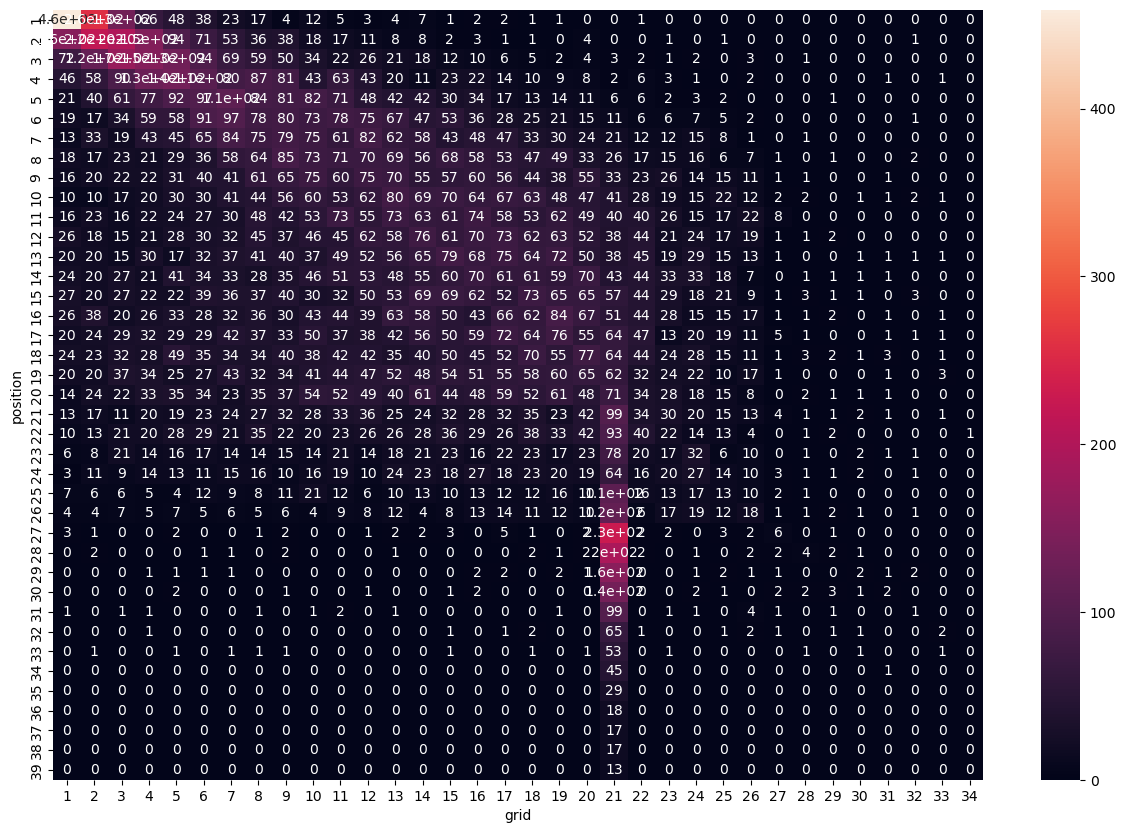

In [93]:
sns.heatmap(cont_table, annot=True)

In [94]:
df = df.loc[df['year']>=2000].copy()

In [36]:
cont_table = pd.crosstab(df['position'], df['grid'])

<AxesSubplot:xlabel='grid', ylabel='position'>

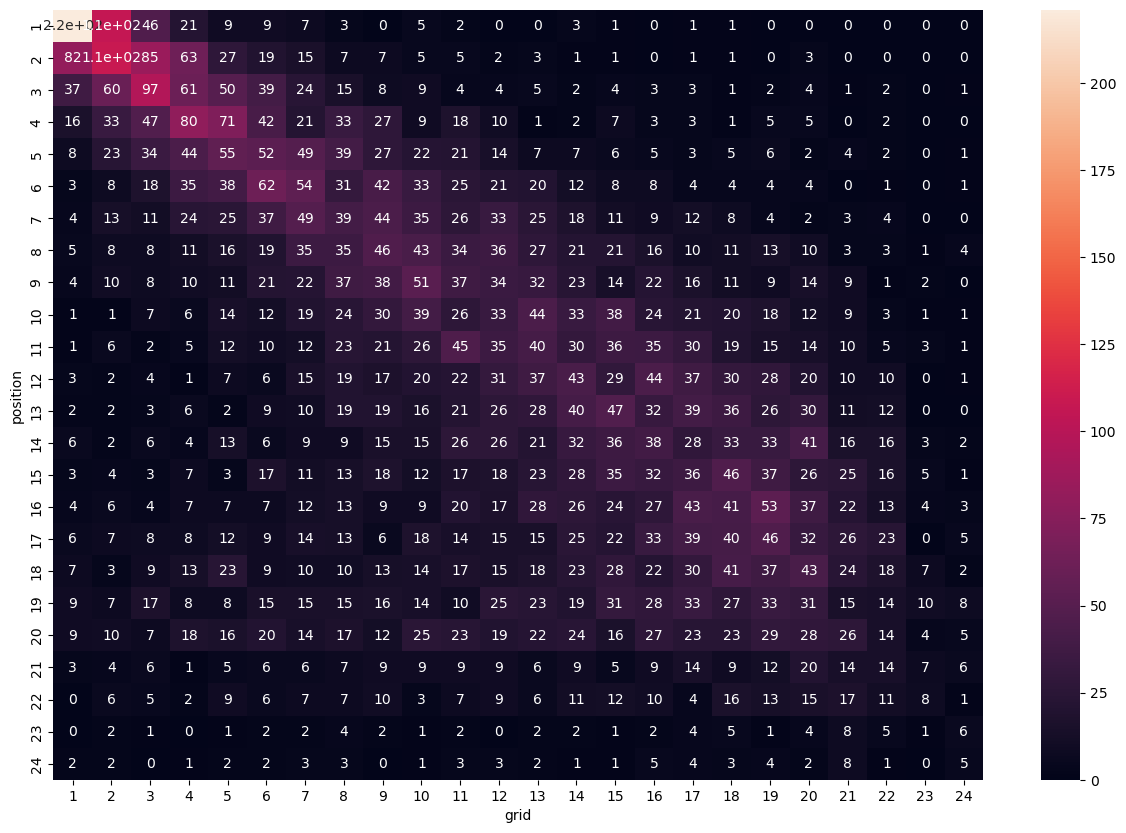

In [37]:
sns.heatmap(cont_table, annot=True)

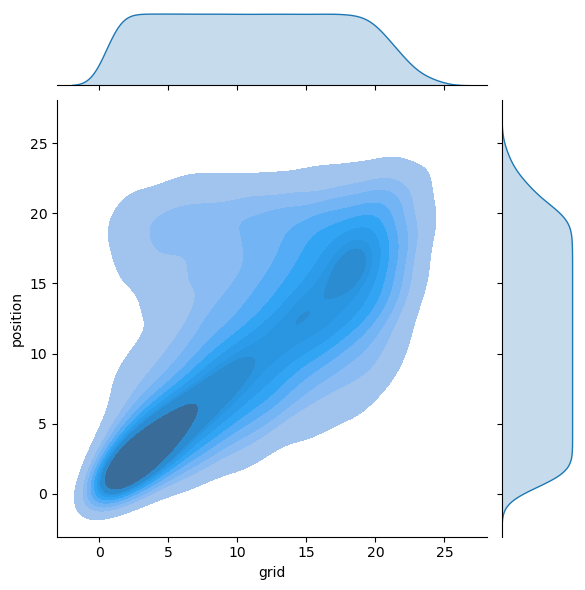

In [38]:
sns.jointplot(data=df, x='grid', y='position', kind='kde', fill=True)

<AxesSubplot:xlabel='grid', ylabel='position'>

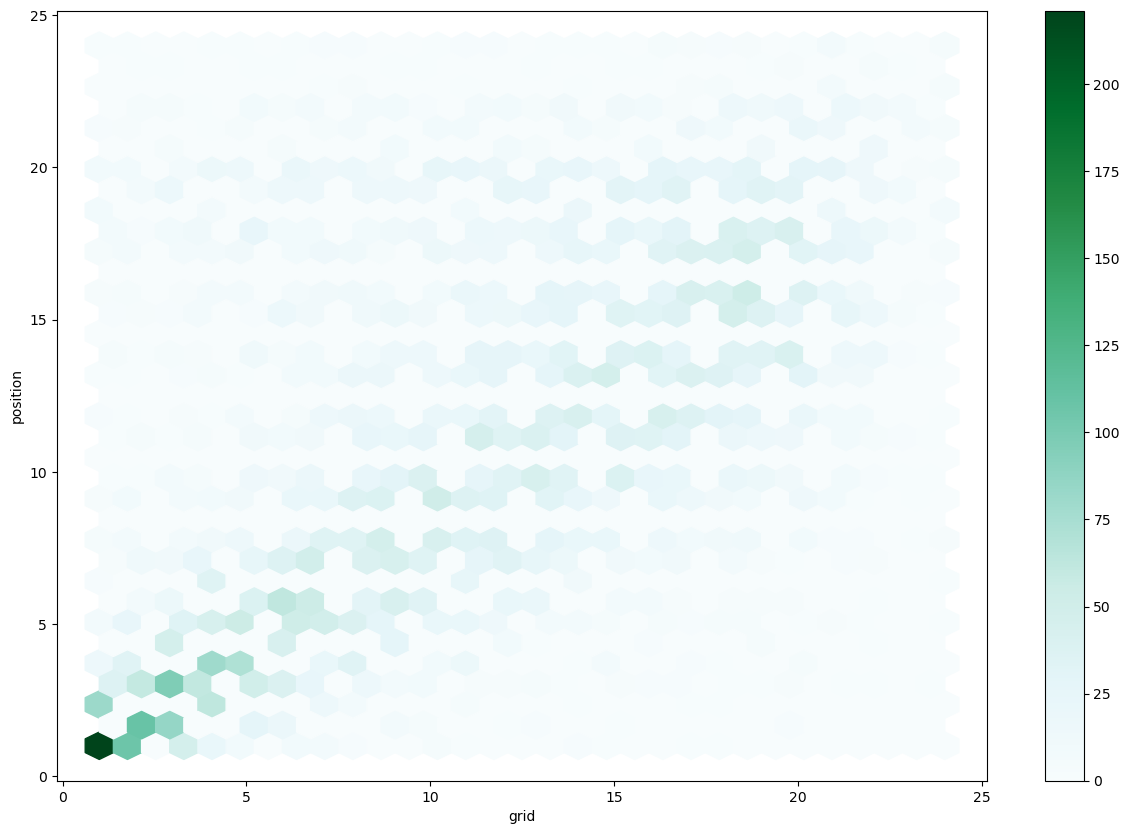

In [48]:
df.plot.hexbin(x='grid', y='position', gridsize=30)

## Puntos en mundial

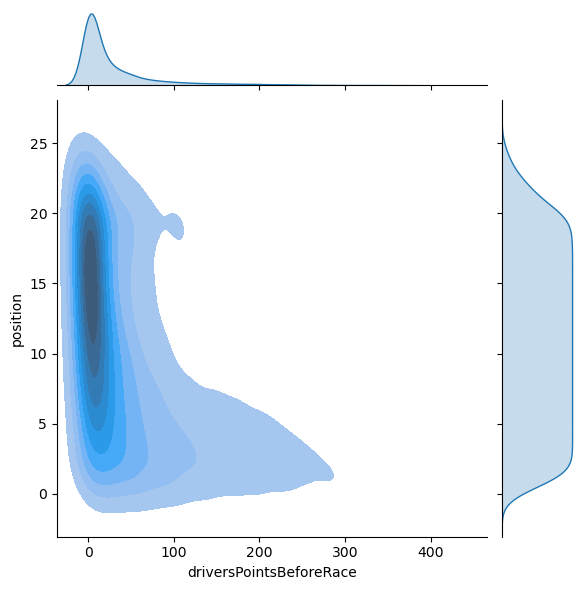

In [52]:
sns.jointplot(data=df, x='driversPointsBeforeRace', y='position', kind='kde', fill=True)

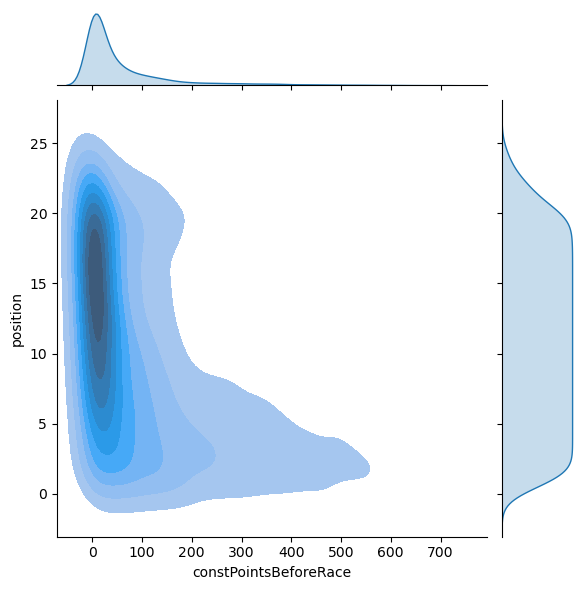

In [53]:
sns.jointplot(data=df, x='constPointsBeforeRace', y='position', kind='kde', fill=True)

## Edad y experiencia

C:\Users\ManuelV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

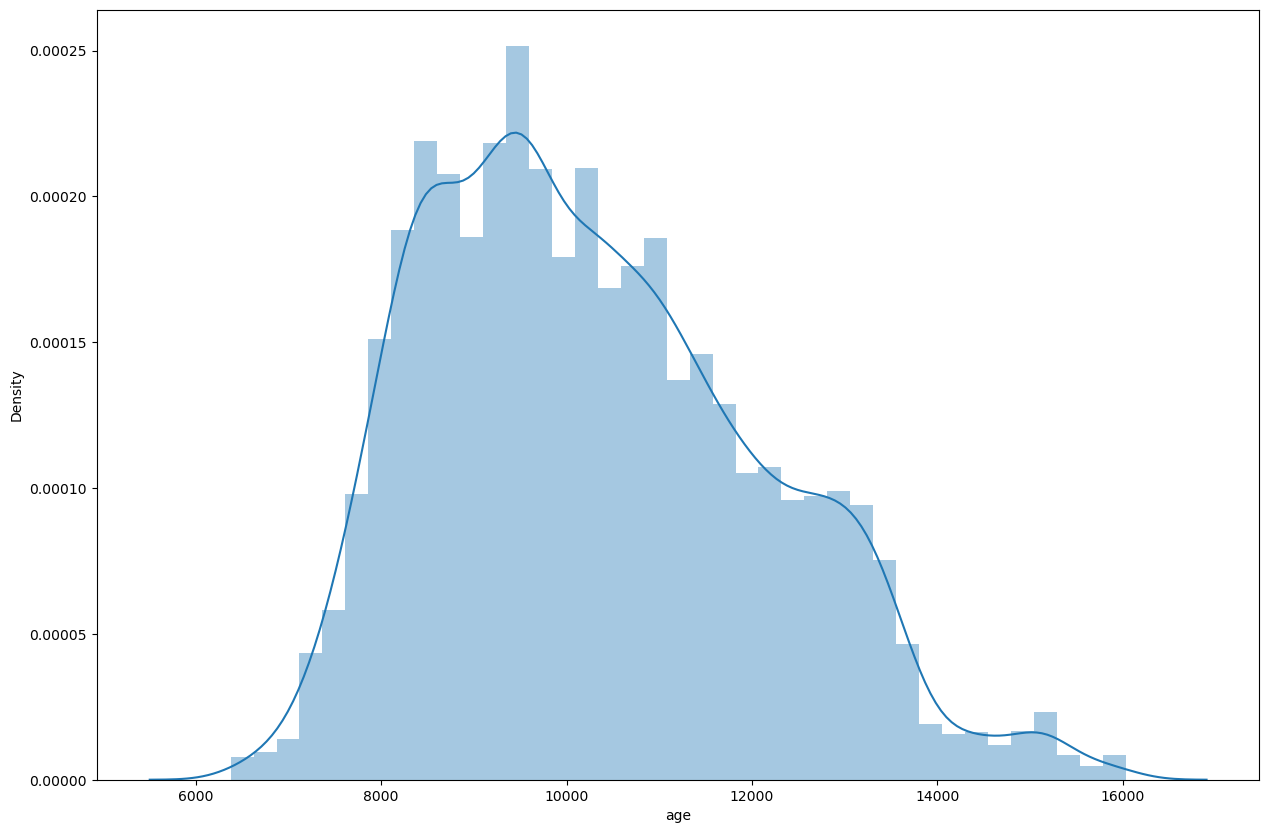

In [56]:
sns.distplot(df['age'])

C:\Users\ManuelV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='experience', ylabel='Density'>

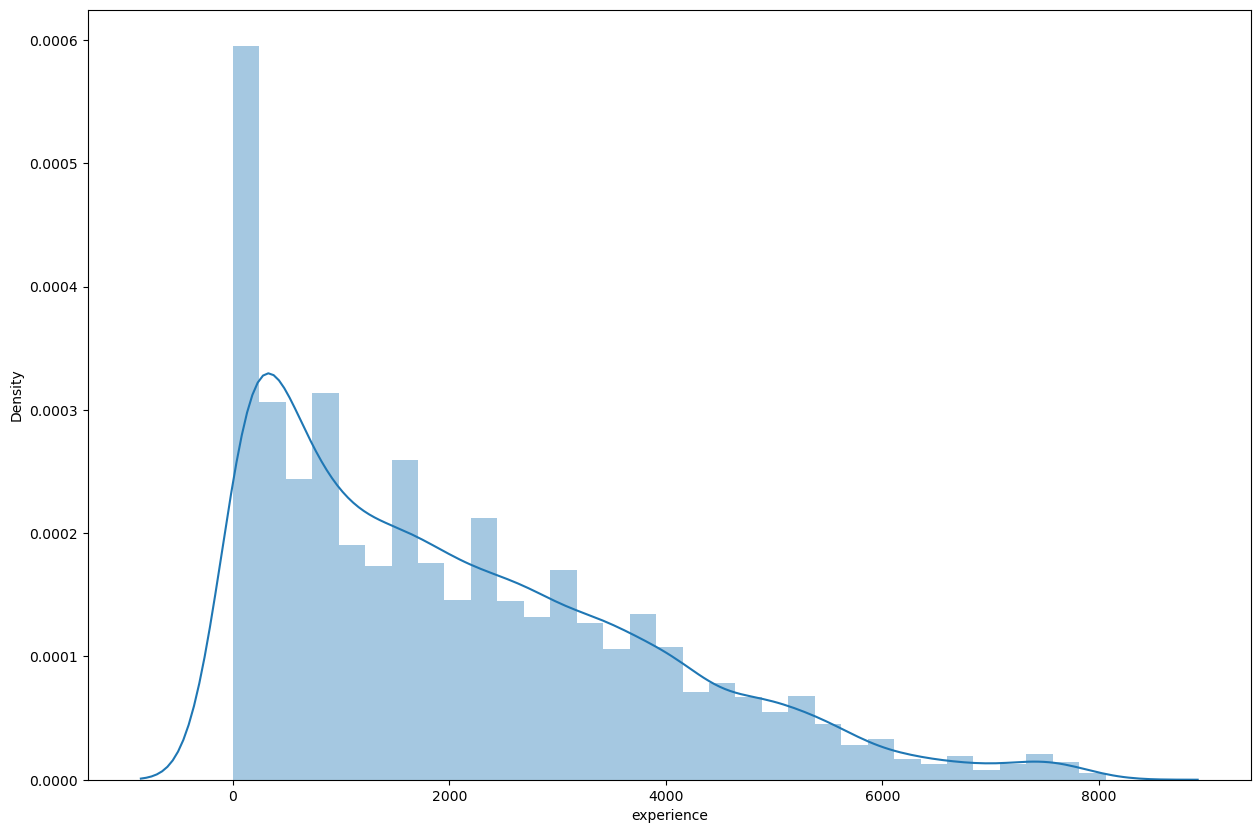

In [61]:
sns.distplot(df['experience'])

<AxesSubplot:xlabel='position', ylabel='age'>

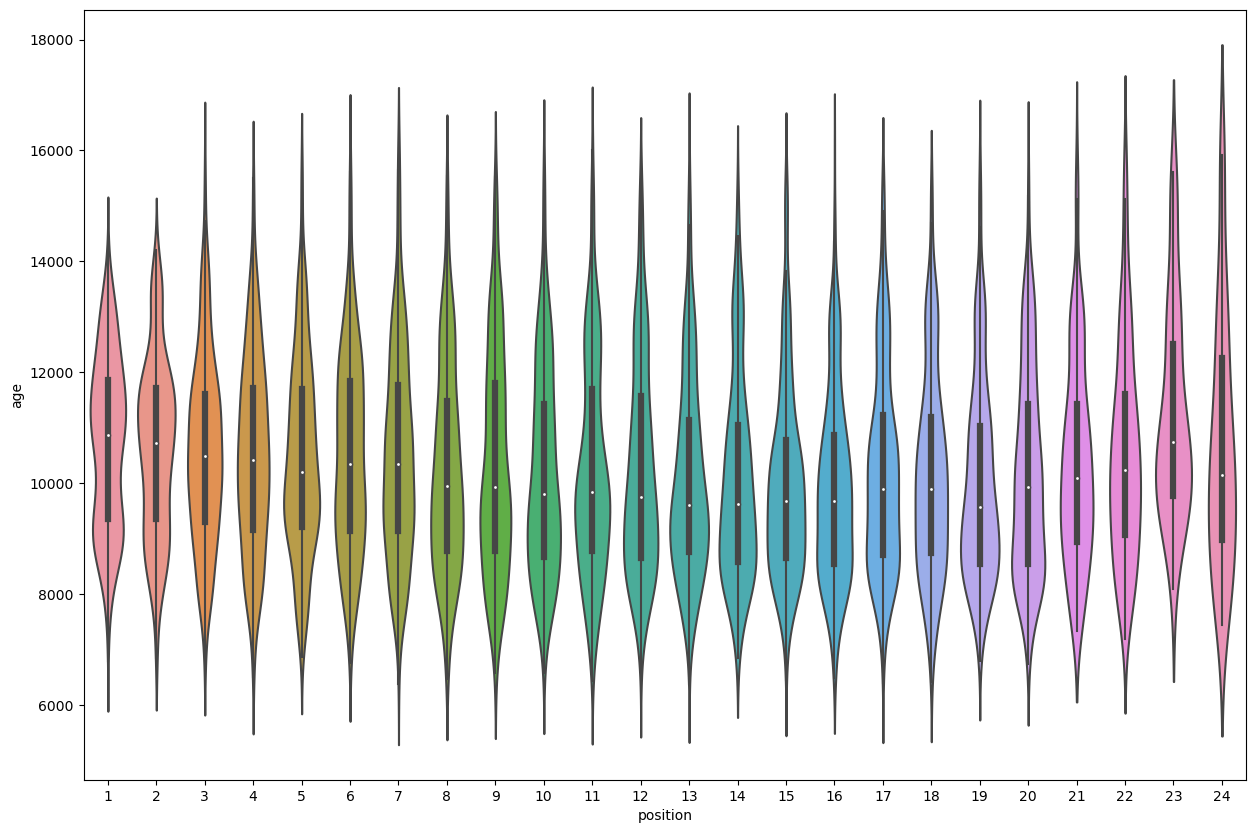

In [59]:
sns.violinplot(data=df, x='position', y='age')

<AxesSubplot:xlabel='position', ylabel='experience'>

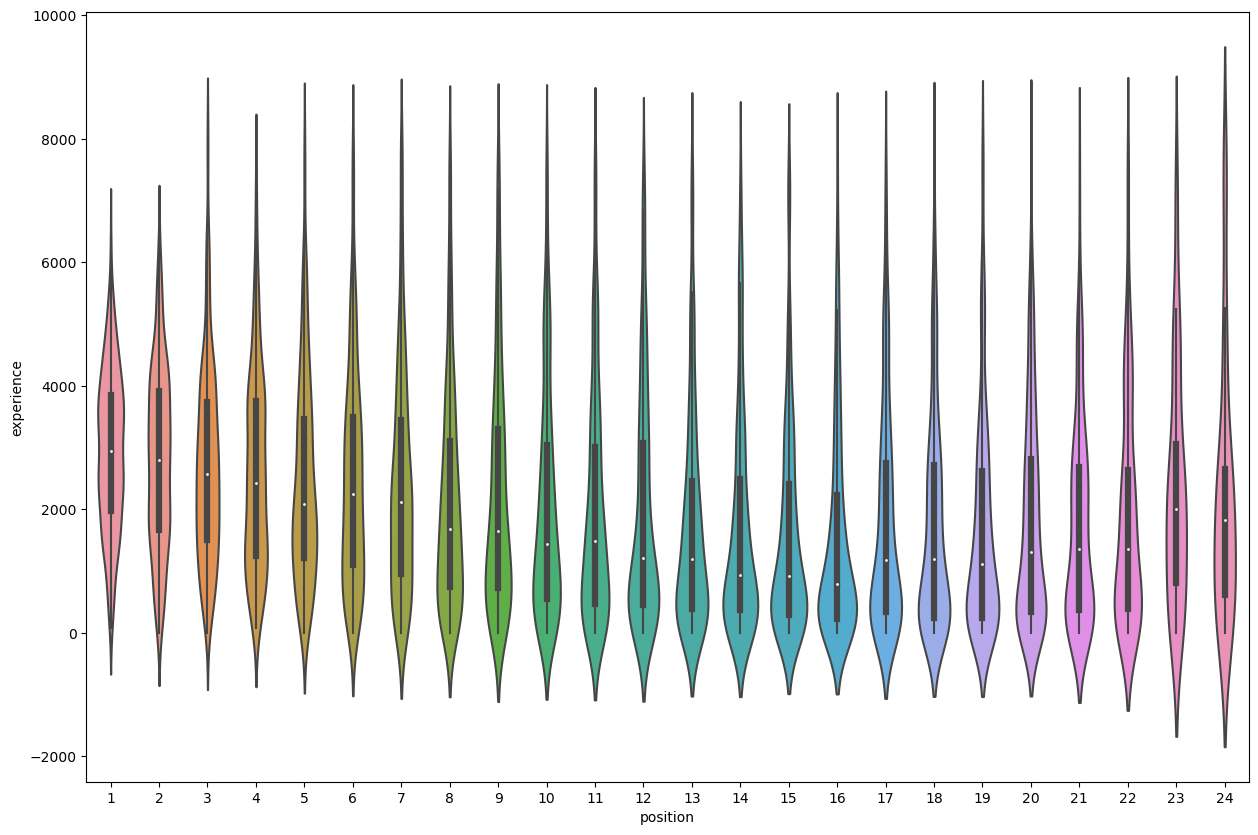

In [60]:
sns.violinplot(data=df, x='position', y='experience')

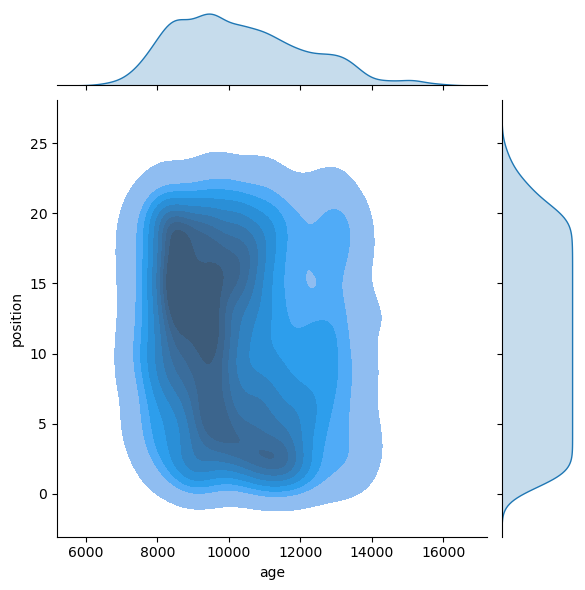

In [62]:
sns.jointplot(data=df, x='age', y='position', kind='kde', fill=True)

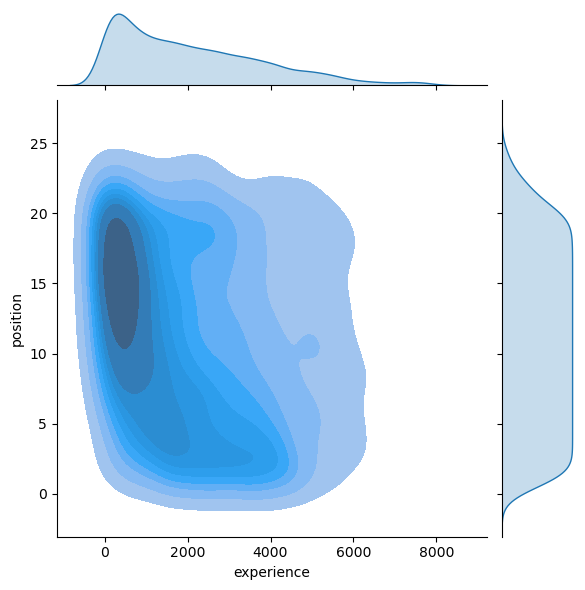

In [63]:
sns.jointplot(data=df, x='experience', y='position', kind='kde', fill=True)

## Posición inicial y final por ronda

<AxesSubplot:xlabel='grid', ylabel='position'>

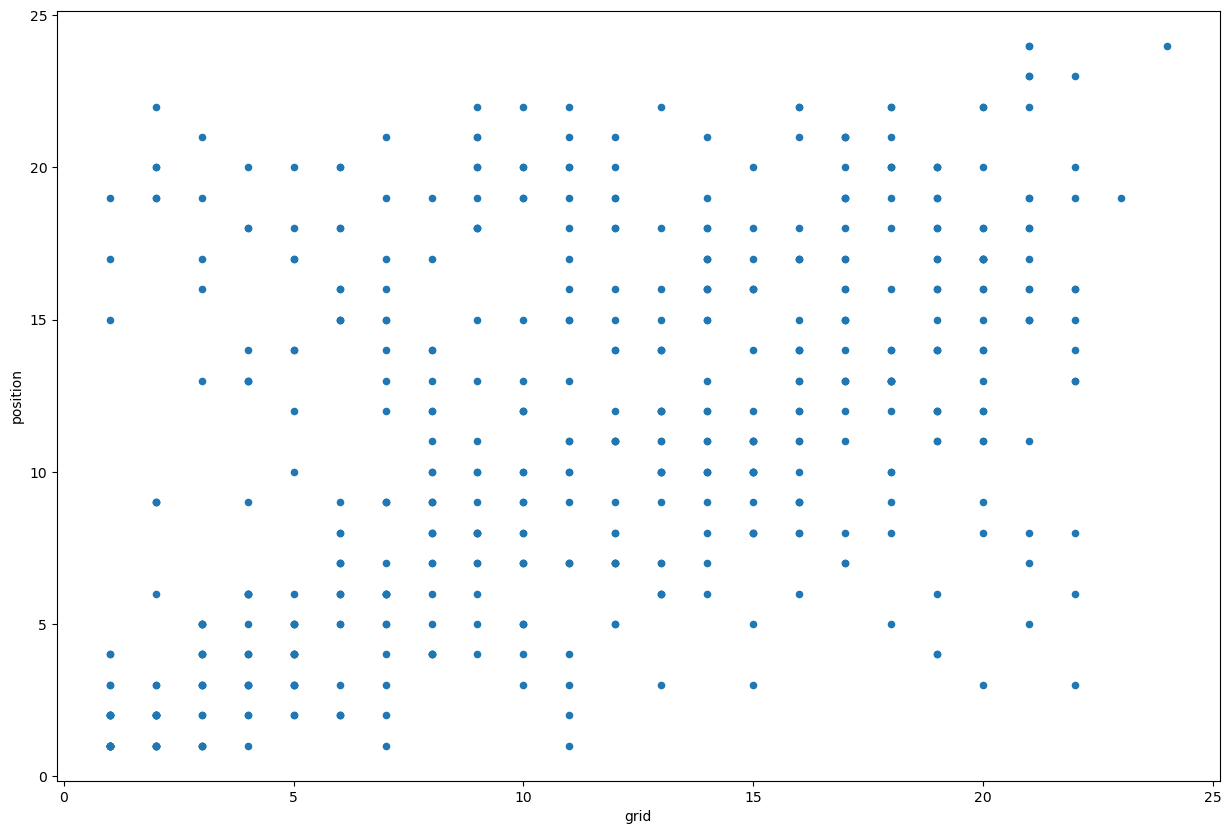

In [88]:
df.loc[df['round']==1].plot.scatter(x='grid', y='position', colormap='Spectral')

<AxesSubplot:xlabel='grid', ylabel='position'>

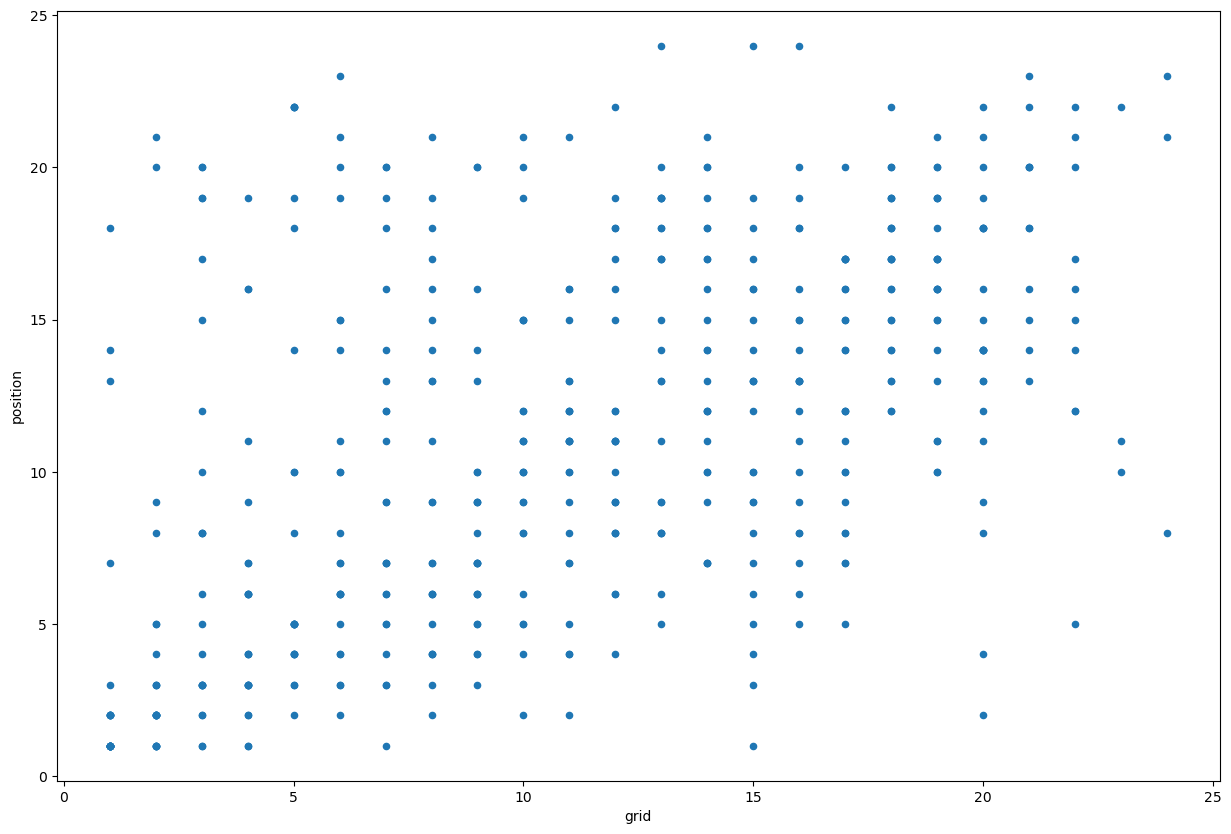

In [89]:
df.loc[df['round']==15].plot.scatter(x='grid', y='position', colormap='Spectral')

<AxesSubplot:xlabel='grid', ylabel='position'>

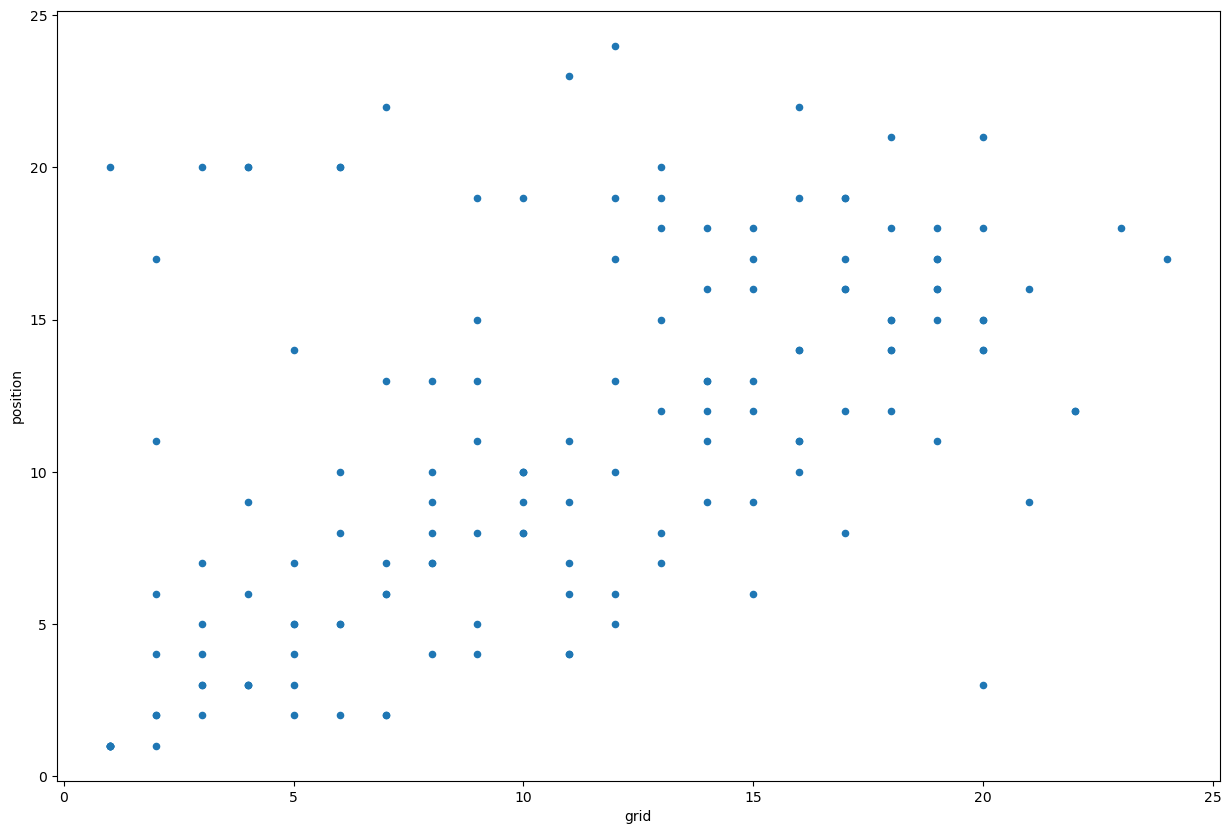

In [90]:
df.loc[df['round']==20].plot.scatter(x='grid', y='position', colormap='Spectral')

## Cantidad de datos

C:\Users\ManuelV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='round'>

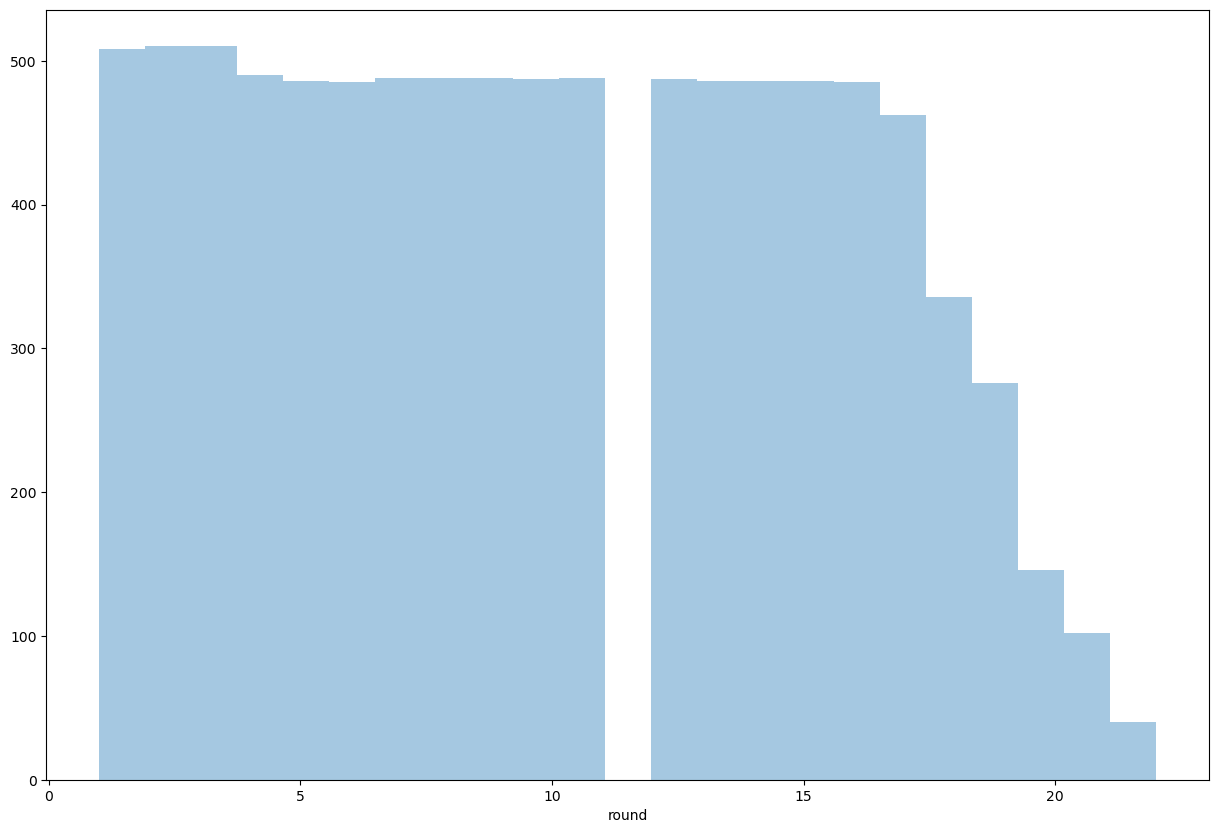

In [77]:
sns.distplot(df['round'], kde=False)

C:\Users\ManuelV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year'>

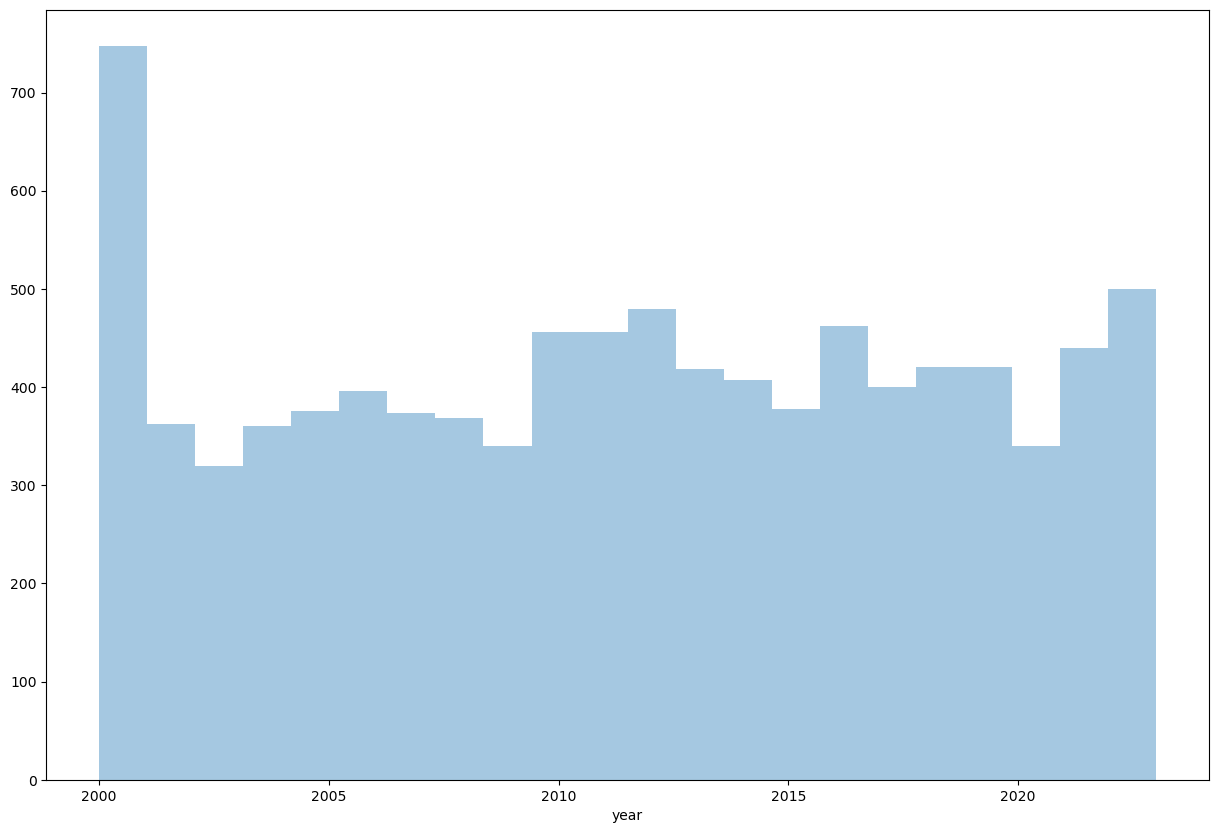

In [86]:
sns.distplot(df['year'], kde=False)